# ATMS 591a: HWK1      

##### molly wieringa, jan 28th, 2021

In [1]:
# import necessary packages

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

## 1. Terrestrial vs solar origins of radiation in Earth's atmosphere

In [2]:
# Set up constants

Ts = 5785   #Kelvin K
Te = 255    #Kelvin K

Rs = 6.95E8 #m
Re = 6.37E6 #m
des = 1.496E11 #m

lam = np.linspace(1E-7,1E-4,5000)   #wavelength range m

h = 6.63E-34   #Planck's constant Js
c = 2.99E8     #speed of light m/s
k = 1.38E-23   #Boltzmann constant J/K

### (a) Plot  the  blackbody  radiation  Intensity $I_{\lambda}(T)  =  2hc^{2}\frac{\lambda^{−5}}{e^{hc/\lambda kT} − 1}$(as  a  function  of  temperature  and  wavelength) for the Sun and Earth. At what wavelengths ($\lambda_{max}$) do each spectrum peak?

In [3]:
# Define functions to calculate intensity and lambda_max
def intensity(lambdas, T):
    INT = 2*h*(c**2)*(lambdas**-5/(np.exp((h*c)/(lambdas*k*T)) - 1))
    
    return INT

def find_lam_max(intensity,lambdas):
    IND = np.argmax(intensity)
    
    lam_max = lambdas[IND]
    
    return lam_max

In [4]:
# Calculate intensity for Sun and Earth
Int_sun = intensity(lam, Ts)
Int_earth = intensity(lam, Te)

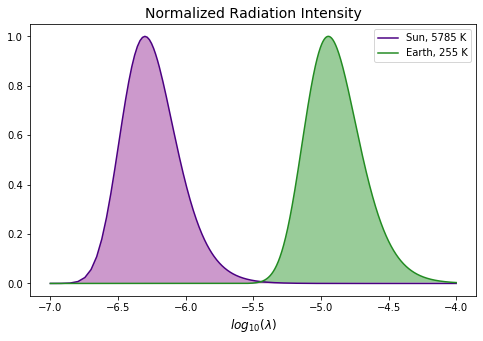

In [5]:
# Plot radiation curves
fig = plt.figure(figsize=[8,5])
plt.plot(np.log10(lam),Int_sun/np.max(Int_sun), 'indigo', label = 'Sun, 5785 K')
plt.plot(np.log10(lam),Int_earth/np.max(Int_earth), 'forestgreen', label = 'Earth, 255 K')
plt.fill(np.log10(lam),Int_sun/np.max(Int_sun), 'purple',alpha = 0.4)
plt.fill(np.log10(lam),Int_earth/np.max(Int_earth), 'green', alpha = 0.4)
plt.title('Normalized Radiation Intensity',fontsize = 14)
plt.xlabel('$log_{10}(\lambda$)', fontsize = 12)
plt.legend()
plt.show()

In [6]:
# Calculate lambda_max for each curve
lam_max_S = find_lam_max(Int_sun, lam)
lam_max_E = find_lam_max(Int_earth, lam)

# Print results
print('maximum wavelength for the sun = ', "%.4f" % (lam_max_S*1E9), 'nm')
print('maximum wavelength for the earth = ',"%.4f" % (lam_max_E*1E6), 'um')

maximum wavelength for the sun =  499.6799 nm
maximum wavelength for the earth =  11.3510 um


In [7]:
#We can sanity check the above results using Wien's law

x = 4.965      #classic solution for x, from class
const_Wien = h*c/(x*k)
lam_max_S_wien = const_Wien/Ts
lam_max_E_wien = const_Wien/Te

print("Wien's law maximum wavelength for the sun = ", "%.4f" % (lam_max_S_wien*1E9), 'nm')
print("Wien's law maximum wavelength for the earth = ", "%.4f" % (lam_max_E_wien*1E6), 'um')

Wien's law maximum wavelength for the sun =  500.1301 nm
Wien's law maximum wavelength for the earth =  11.3461 um


Excellent! On to bigger and better things...

### (b) What are the values of the ratio of the spectra,$\frac{I_{\lambda}(T_S)}{I_{\lambda}(T_E)}$, evaluated at each of the two values of $\lambda_{max}$ you just calculated?

In [8]:
# Calculate the spectra as T_s, T_e, and lambda_max,Sun
indS_Int_sun = intensity(lam_max_S,Ts)
indS_Int_earth = intensity(lam_max_S, Te)

# Calculate the spectra as T_s, T_e, and lambda_max,Earth
indE_Int_sun = intensity(lam_max_E,Ts)
indE_Int_earth = intensity(lam_max_E, Te)

# Take ratios
ratio_lam_S = indS_Int_sun/indS_Int_earth
ratio_lam_E = indE_Int_sun/indE_Int_earth

# Print results
print("Spectra ratio at the Sun's wavelength of maximum emission =",ratio_lam_S)
print("Spectra ratio at the Earth's wavelength of maximum emission =",ratio_lam_E)

Spectra ratio at the Sun's wavelength of maximum emission = 6.407168809729984e+46
Spectra ratio at the Earth's wavelength of maximum emission = 580.7057127598149


So, here, if both bodies emit at the same peak wavelength (the Sun's), but at different temperatures, the Sun emits at an intensity 46 orders of magnitude times that of the Earth. If both bodies emit at the Earth's peak wavelength but at their different temperatures, the Sun still emits with an intensity 580 times that of the Earth. This would seem to present a problem-- wouldn't the Sun's emissions overwhelm the Earth's at the Earth's peak wavelength, preventing us from meaningfully separating radiation from each source? Enter...

### (c) Plot the spectrum $I_{\lambda}(T)$ for solar radiation reaching Earth’s atmosphere (that is, normalize $I_{\lambda}(T)$ by the fraction of the Sun’s emitted radiation actually reaching Earth).  What is the ratio of the spectra in part b) using this normalized solar spectrum (again evaluated at the two values of $\lambda_{max}$)?

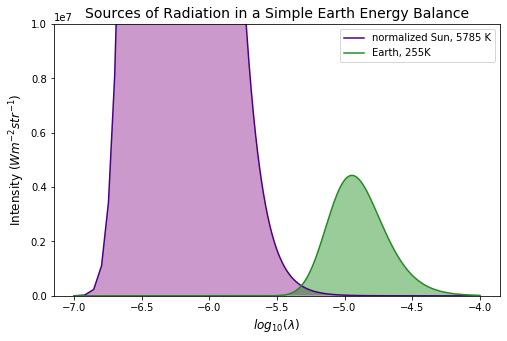

In [9]:
# Calculate the spectrum for the fraction of the Sun's emitted radiation that reaches the earth, which is the ratio of intensity 
# emitted over the surface area of the Sun to the intensity of that radiation once it's been dispersed over the "surface" area of 
# a sphere around the Sun which intersects the earth (4*pi*Rs**2/4*pi*des**2).

Int_sun_reached = (Rs/des)**2*Int_sun/4

# Plot
fig = plt.figure(figsize=[8,5])
plt.plot(np.log10(lam),Int_sun_reached, 'indigo', label = 'normalized Sun, 5785 K')
plt.plot(np.log10(lam),Int_earth, 'forestgreen', label = 'Earth, 255K')
plt.fill(np.log10(lam),Int_sun_reached, 'purple',alpha = 0.4)
plt.fill(np.log10(lam),Int_earth, 'green', alpha = 0.4)

plt.ylim([0, 0.1E8])
plt.title("Sources of Radiation in a Simple Earth Energy Balance", fontsize=14)
plt.xlabel('$log_{10}(\lambda)$',fontsize = 12)
plt.ylabel('Intensity ($Wm^{-2} str^{-1}$)', fontsize = 12)
plt.legend()
plt.show()

In [10]:
# Calculate the spectra ratios using the normalized Sun spectrum (what is the ratio of radiation spectra at the Earth's "surface"?)
ratio_lam_S_reached = (Rs/des)**2*indS_Int_sun/(4*indS_Int_earth)
ratio_lam_E_reached = (Rs/des)**2*indE_Int_sun/(4*indE_Int_earth)


print("Spectra ratio at the Sun's wavelength of maximum emission (at Earth) =", "%.4f" % (ratio_lam_S_reached*1E-41) + "e+41")
print("Spectra ratio at the Earth's wavelength of maximum emission (at Earth) =","%.4f" % (ratio_lam_E_reached*1E3) + "e-3")

Spectra ratio at the Sun's wavelength of maximum emission (at Earth) = 3.4571e+41
Spectra ratio at the Earth's wavelength of maximum emission (at Earth) = 3.1333e-3


### (d) At what approximate wavelength $\lambda_{overlap}$ do the Sun and Earth’s radiation spectra in part c) overlap? Integrate the ratio in part c) from $\lambda_{overlap}$ to $\lambda= 100um$.  What value do you get, and what does this say about the relative amount of longwave radiation at the top of Earth’s atmosphere coming from solar versus terrestrial origins?

The solar radiation spectra meaningfully overlap beginning at approximately $\lambda = 10^{-5.5} = 10^{-11/2}$ (from the figure plotted in part (c)).

In [11]:
# Define beginning and end point of integration
approx = 10**(-11/2)
end100 = 100*1E-6

idx1 = (np.abs(lam - approx)).argmin()
idx2 = (np.abs(lam - end100)).argmin()

# Integrate (numerically using trapz)
ratio_longwave = np.trapz(Int_sun_reached[idx1:idx2], x= lam[idx1:idx2])/np.trapz(Int_earth[idx1:idx2], x= lam[idx1:idx2])

# Print resutls
print('The radiation emitted by the Sun at the same wavelengths over which the Earth emits is', "%.4f" % ratio_longwave, 'of the radiation emitted by the Earth.')


The radiation emitted by the Sun at the same wavelengths over which the Earth emits is 0.0264 of the radiation emitted by the Earth.


The results from parts (c) and (d) show that while the majority of the shortwave radiation ($\lambda \approx 10^{-6}$) involved in the Earth's energy balance is coming from the Sun, the majority of the longwave radiation ($\lambda \approx 10^{-5}$) comes from the Earth. This justifies the manner in which we separate radiation in the energy balance into "incoming shortwave" and "outgoing longwave."

### (e) Explain in words (a paragraph or less) where the ‘$4$’ comes from in the Stefan-Boltzmann equation ($\sigma T^4$).

Wien's Law tells us that there is an inversely proportional relationship between wavelength and temperature, which means that there is a proportional relationship between frequency and temperature. The Stefan-Boltzmann equation integrates intensity over all the possible frequencies; intensity is defined by energy density, which is dependent upon the geometry of the problem-- in 3-D, energy density is energy per volume and dependent upon frequency of radiation in three directions. As such, intensity is proportional to frequency to the third power, meaning the integrated flux from Stefan-Boltzmann is a function of frequency (and therefore temperature) to the fourth power. 

## 2. Climate of Flatland

### (a) The intensity equations derived in class were $I_{\nu} = \frac{2h}{c^2} \frac{\nu^3}{e^{h\nu/kT} − 1}$ and $I_{\lambda} = 2hc^2 \frac{\lambda^{-5}}{e^{hc/\lambda kT} − 1}$. Show that the equivalent equations are $I_{\nu} = \frac{2h}{c}\frac{\nu^2}{e^{h\nu/kT} − 1}$ and $I_{\lambda} = 2hc^2\frac{\lambda^{-4}}{e^{hc/\lambda kT} − 1}$ when derived for the 2-dimensional universe of Flatland.

$\textbf{Derivation}$

If we begin with the intent of determining the energy density per unit area in Flatland,

$(1)$ $ u(\nu) =\frac{\#  of modes}{area} * \frac{E}{mode} * d\nu $,

we must build our understanding upon some foundational pieces. First, we must have some grasp of how many energy modes exist in Flatland. The number distribution of energy modes can be described as $dN = \frac{\#  of modes}{area} * {area} * {\# dofs}$. 

We assume that the density of modes per unit area is 1 and that there is only 1 dof of polarization in 2-D. We define an incremental circular area in the positive quadrant of the 2-D plane with a radius $p = (l^2 + m^2)^{1/2}$. Frequency $\nu$ is related to wavenumber $\bar{k}$ ($k_{(x,y)} = \frac{\pi}{L} (l,m)$, in two dimensions where $l$ and $m$ describe the $x$ and $y$ directions, respectively, and L is length scale of the considered area) as $\nu = \frac{c}{2\pi}|\bar{k}|$. Therefore, $p$ can be written in terms of frequency as $p = \frac{2L\nu}{c}$, 

$(2)$ $ dN = 1 * \frac{1}{4}2\pi pdp * 1 = \frac{\pi p}{2}dp = \frac{\pi}{2}\frac{2L\nu}{c}d(\frac{2L\nu}{c}) = \frac{2\pi L^2}{c^2}\nu d\nu$.

Next, we wish to understand the average energy per mode. A quantized energy state is described as $E_n = nh\nu$, and the probability of being in any given energy state $E_n$ is given by the Boltzmann distribution, $p_n = \frac{e^{\frac{-E_n}{kT}}}{\sum{e^{\frac{-E_n}{kT}}}}$, where k is the Boltzmann constant and T is the temperature. The average energy state is then $\bar{E} = \sum{E_n}{p_n} = \sum{nh\nu \frac{e^{\frac{-nh\nu}{kT}}}{\sum{e^{\frac{-nh\nu}{kT}}}}}$. We can define a dummy term $x = e^{\frac{-h\nu}{kT}}$, and express $\bar{E}$ as $h\nu \sum{n \frac{x^n}{\sum{x^n}}}$. Using a series of fun mathematical tricks, we can express the numerator and denominator of this summation as power series, $\bar{E} = h\nu \frac{x + x^2 + x^3 + ...}{1 + x + x^2 + ...}$, which are approximations of $\frac{x}{(1-x)^2}$ and $\frac{1}{(1-x)}$, respectively. The expression for $\bar{E}$ then becomes,

$(3)$ $\bar{E} = h\nu \frac{x}{1-x} = \frac{h\nu}{x^{-1} - 1} = \frac{h\nu}{e^{\frac{h\nu}{kT}}- 1}$.

Plugging Equations $(2)$ and $(3)$ back into Equation $(1)$, we find energy density for Flatland to be

$(4)$ $u(\nu) = \frac{2\pi h \nu^2}{c^2(e^{h\nu/kT}- 1)}  d\nu$.

The quantity we are actually interested in, however, is intensity as a function of frequency or wavelength and temperature ($I_{\nu,\lambda}(T)$). Intensity is defined 

$(5)$ $I_{\nu,\lambda}(T) = \frac{flux}{steradian} = \frac{total energy}{distance * time * steradian}$. 

The total energy is then the energy density from Equation $(4)$ multiplied by the area. This can be expressed as the integration of the energy density of many infinitesimally small tubular area, $u(\nu)d\nu * c\Delta{t} * dlcos\theta * \frac{d\theta}{2\pi}$, 

$(6)$ $I_{\nu}(T) = \frac{u(\nu)d\nu *c *\Delta t dl} {2\pi \Delta t dl}\int_{-\pi/2}^{\pi/2}{cos\theta d\theta } = \frac{u(\nu)d\nu*c}{\pi} = \frac{2h}{c}\frac{\nu^2}{(e^{h\nu/kT}- 1)}d\nu$.

To express intensity as a function of wavelength, we can use the relationship between frequency and wavelength ($\nu = c/\lambda$). Replacing frequency in Equation $(6)$ with wavelength produces

$(7)$ $I_{\lambda}(T) = \frac{2h}{c}\frac{(c/\lambda)^2}{(e^{hc/\lambda kT}- 1)}d(\frac{c}{\lambda}\frac{\lambda}{\lambda}) = 2hc^2 \frac{\lambda^{-4}}{(e^{hc/\lambda kT}- 1)} d\lambda$.

Equations $(6)$ and $(7)$ end the proof of the intensity equations in 2-D Flatland.

### (b) Wein’s  Law  of  Diplacement  derived  in  class  was $\lambda_{max}T =  2898um K$.  What  is  the  equivalent  equation  in  the  2-dimensional universe of Flatland? Assuming the temperature of the Sun is still $T_S= 5785 K$, at what wavelength does the solar intensity peak?

Wien's Law searches for the wavelength where the intensity of radiation is a maximum, 

$(1)$ $\frac{dI}{d\lambda} = \frac{d(\frac{2hc^2\lambda^{-4}}{(e^{hc/\lambda kT} -1)})}{d\lambda} = \frac{hc}{kT\lambda} \frac{e^{hc/\lambda kT}}{(e^{hc/\lambda kT} -1)} - 4 =0$

We can solve Equation $(1)$ by introducing a dummy variable $x = hc/\lambda kT$, and solving numerically for the value of $x$ that satsifies

$(2)$ $\frac{dI}{d\lambda} = \frac{xe^x}{e^x - 1} = 0$.

We proceed to do so by introducing the function, $\textit{junky}$, and solving using SciPy's $\textit{fsolve}$ method.

In [12]:
# Define a function that will numerically solve for x

def junky(x):
    guess = x*np.exp(x)/(np.exp(x) - 1) - 4
    
    return guess 

In [13]:
# Solve for x
init = 4.965     #old Wien's law constant as initial guess
solution = fsolve(junky, init)
print("x =", "%.4f" % solution)  

# Solve Wien's law for lambda_max
const_Wien_flatland = h*c/(solution*k)
print("Wien's constant in Flatland =", "%.2f" %(const_Wien_flatland * 1E6))

x = 3.9207
Wien's constant in Flatland = 3663.90


In sum, we found an numerical solution for x at 3.9207. We then used the relationship $x = hc/\lambda kT$ to solve for a balance between $\lambda_{max}$ and $T$. Using this new Wien's Law constant, we can solve for the Flatland $\lambda_{max}$ for the Sun.

In [14]:
# Calculate Flatland's wavelength of maximum solar intensity using Wien's law with our new constant
lam_max_S_flatland = const_Wien_flatland/Ts
print("Wavelenth of peak solar intensity in Flatland =", "%.4f" % (lam_max_S_flatland*1E9),'nm')

Wavelenth of peak solar intensity in Flatland = 633.3441 nm


### (c) As derived in class, the Stefan-Boltzmann equation is $\sigma T^4$, where $\sigma = 5.67x10^{-8} Wm^{-2}K^{-4}$. What is the equivalent equation and value of $\sigma$, in the 2-dimensional universe of Flatland? 

To derive the Flatland Stefan-Boltzmann equation, we integrate $F = \int{I_\nu(T)d\nu}$ over all frequencies.

$(1)$ $F = \frac{2h}{c}\int_{0}^{\infty}\frac{\nu^2}{e^{h\nu/kT} - 1}d\nu$

If we use the dummy variable $x = h\nu/kT$ and $dx = h/kT d\nu$ then we can express the integral as

$(2)$ $F = \frac{2k^3T^3}{ch^2}\int_{0}^{\infty}{\frac{x^2}{e^x -1}}dx$. 

The Flatland Stefan-Boltzmann equation is therefore:

$(3)$ $F = \frac{2k^3\int_{0}^{\infty}{\frac{x^2}{e^x -1}}}{ch^2} T^3 = \sigma_{flat} T^3$.

The integral itself has the solution $\int_{0}^{\infty}{\frac{x^2}{e^x -1}}dx = 1.202 * 2!$ (from the solution form provided), so the new Stefan-Boltzmann constant $\sigma_{flat} = \frac{4.808k^3}{ch^2}$, as calculated below.

In [15]:
# calculate the new Stefan-Boltzmann constant (units of W/mK^3)

sig_flatland = 4.808 * k**3/(c*h**2)
print("The Stefan Boltzmann constant in Flatland =", sig_flatland)

The Stefan Boltzmann constant in Flatland = 9.613985727627956e-11


### (d) What is the solar constant $S_0$ in Flatland?  How much solar radiation reaches Earth averaged over its 1-dimensional surface (units of $W m^{-1}$)? Assuming the albedo of Earth is $\alpha= 0.3$, just like in our universe, what is the effective emission temperature of Earth? Note that values you get for radiation and temperature in Flatland may be quite different those in our3-dimensional universe.

As derived implicitly in part (a) of this problem, the geometric factor for a 2-D planet is $\pi$.  

In [16]:
# Calculate the new solar constant and solar radiation averaged over it's 1-d surface, noting that in Flatland, the emission from the Sun that reaches Flatland Earth is a ratio of 
# circumferences, not surface areas (2*pi*Rs/2*pi*des).

S_flatland = sig_flatland*(Ts**3)*(Rs/des)
S_averaged = S_flatland/np.pi

# Calculate the Flatland Earth's effective temperature (using 2-dimensional Stefan Boltzmann relation)
alpha = 0.3
Te_flatland = ((1-alpha)*S_averaged/(sig_flatland))**(1/3)

# Print results
print("Flatland solar constant =", "%.4f" % S_flatland, "W/m")
print("Solar radiation averaged over a 1-D Earth =", "%.4f" % S_averaged, "W/m")
print("Effective emission temperature of the Flatland Earth =", "%.4f" % Te_flatland, "K")

Flatland solar constant = 0.0865 W/m
Solar radiation averaged over a 1-D Earth = 0.0275 W/m
Effective emission temperature of the Flatland Earth = 585.1993 K


## 3. Radiative forcing and global warming in a two-layer atmosphere model

Consider a two-layer model of the atmosphere (an extension of the one-layer atmosphere we discussed in lecture). $T_s$ is Earth’s global average surface temperature and $T_1$ and $T_2$ are the temperatures of the two atmospheric layers, with emissivities $\epsilon_1$ and $\epsilon_2$, respectively; $S_0 = 1370 Wm^{-2}$ is the solar constant; $\sigma = 5.67x10^{-8} Wm^{-2}K^{-4}$ is the Stefan-Boltzmann  constant;  and $\alpha =  0.3$ is the global average albedo. As a reminder, when in equilibrium, you can apply conservation of energy at any layer you want.  There are four equations (at TOA, surface, layer 1 and layer 2) and three unknowns ($T_s$, $T_1$ and $T_2$) giving:

##### (1)   $T_s^4=(1-\alpha) \frac{S_0}{4}\frac{(4-\epsilon_1\epsilon_2)}{\sigma(2-\epsilon_1)(2-\epsilon_2)}$
##### (2)   $T_1^4= T_s^4 \frac{(2+\epsilon_2-\epsilon_1\epsilon_2)}{4-\epsilon_1\epsilon_2}$
##### (3)   $T_2^4= T_s^4 \frac{(2-\epsilon_1}{4-\epsilon_1\epsilon_2}$

### (a) What are $T_s$, $T_1$ and $T_2$ for emissivities $\epsilon_1 =  0.65$ and $\epsilon_2 =  0.25$ (this qualitatively represents higher emissivity in the lower troposphere where there is more water vapor)?

In [17]:
# Define constants

e1 = 0.65     #emissivity of layer 1
e2 = 0.25     #emissivity of layer 2
S_0 = 1370    #solar constant, W/m2
sig = 5.67E-8 #stefan-boltzmann constant, W/m2K4
alpha = 0.3   #albedo

# Define functions to calculate temperature at each layer (equations 1-3 above)
def surf_temp(S_0, e1, e2, sig):
    Ts = ((1-alpha)*S_0/4*(4-e1*e2)/(sig*(2-e1)*(2-e2)))**0.25
    return Ts

def temp_1(Ts, e1, e2):
    T1 = (Ts**4 * ((2+e2-e1*e2)/(4-e1*e2)))**0.25
    return T1

def temp_2(Ts, e1, e2):
    T2 = ((Ts**4 * ((2-e1)/(4-e1*e2))))**0.25
    return T2

In [18]:
# Calculate temperature of each layer
Ts = surf_temp(S_0, e1, e2, sig)
T1 = temp_1(Ts, e1, e2)
T2 = temp_2(Ts, e1, e2)

# Print results
print("When e1 = 0.65 and e2 = 0.25:", '\nTs =', "%.2f" % Ts, "K", '\nT1 =',"%.2f" % T1, "K", '\nT2 =',"%.2f" %T2, "K")

When e1 = 0.65 and e2 = 0.25: 
Ts = 287.88 K 
T1 = 247.23 K 
T2 = 221.71 K


### (b) Next consider what happens when $\epsilon_2$ is increased to a value of 0.29 while $\epsilon_1$ stays at the same value.  This represents an abrupt doubling of atmospheric CO$^2$ concentrations for this model (qualitatively capturing the tendency for emissivity to increase by more higher in the atmosphere, where there is less water vapor to overlap with). Calculate the change in net TOA radiation flux (in $Wm^{-2}$) in response to the increase in emissivity but before $T_s$, $T_1$ and $T_2$ have had time to respond (that is, by how much does the TOA radiation change when you use the same temperature values as in part (a) but change to the the new value of $\epsilon_2$). The quantity you’ve just calculated is known as the $\textit{instantaneous}$ radiative forcing.  How does it compare to the standard value of forcing from CO$^2$ doubling you’ve seen quoted?

In [19]:
# Change the emissivity of the second layer 
e2 = 0.29

# Calculate the incoming and outgoing radiation at the TOA
Incoming = (1-alpha)*S_0/4                                                    # incoming SW
Outgoing_TOA = (1-e1)*(1-e2)*sig*Ts**4 + (1-e2)*e1*sig*T1**4 + e2*sig*T2**4   # outgoing LW at TOA

# Calculate the difference between incoming and outgoing
Balance_TOA = Incoming - Outgoing_TOA

# Print results 
print("Instantaneous radiative forcing at TOA =",  "%.2f" % Balance_TOA, "W/m^2")

Instantaneous radiative forcing at TOA = 5.48 W/m^2


This value is higher than the number I've typically heard quoted, which is around 3.5-4 $W/m^2$.

### (c) In the calculation you’ve just performed for part (b) what is the change in net surface radiation flux when $\epsilon_2$ is increased, but before $T_s$, $T_1$ and $T_2$ have had time to respond?  Based on the relative changes in radiation at the TOA and surface, do you expect $T_s$, $T_1$ and $T_2$ to increase or decrease once they are allowed to adjust?

In [20]:
# Calculate the incoming and outgoing radiation at the surface
Incoming  = (1-alpha)*S_0/4                                                  # incoming SW 
Outgoing_Surf = sig*Ts**4 - e1*sig*T1**4 - (1-e1)*e2*sig*T2**4               # net outgoing LW at surface

Balance_Surf = Incoming - Outgoing_Surf
print("Instantaneous radiative forcing at surface =",  "%.2f" % Balance_Surf, "W/m^2")

Instantaneous radiative forcing at surface = 1.92 W/m^2


Because the balance at the surface changes five time less than the balance at the TOA, Ts, T1, and T2 will all increase, but Ts will do so less than T1, which will do so less than T2. In other words, the upper atmosphere will warm more under climate change than the surface, from an instantaneous perspective.

### (d) Imagine you wait long enough for layers 1 and 2 to equilibrate to this new value of $\epsilon = 0.29$, but not long enough for $T_s$ to have time to respond (a month say, which is fast enough for the atmosphere to adjust, but too slow for the surface temperature to change by much).  What are the new values of $T_1$ and $T_2$ once this quasi-equlibrium is reached?  What are the net TOA and surface radiation fluxes now?  The TOA radiation flux you’ve just calculated is known as the $\textit{adjusted}$ or $\textit{effective}$ radiative forcing, which is calculated within climate models by allowing the atmosphere to adjust to increased CO$^2$ while holding surface temperature fixed. Is it larger or smaller than the instantaneous radiative forcing you calculated above (which is calculated within climate models by changing emissivities within the radiation code without allowing any temperatures to change)? Note that the climate community used to define the forcing of climate using the instantaneous definition, but since about 2010 they have shifted to using effective forcing for reasons we’ll discuss in lecture soon.

In [21]:
# Calculate new equilibrated temperatures for the atmospheric layers, keeping the surface temp (Ts) fixed at the original value
T1_mid = temp_1(Ts, e1, e2)
T2_mid = temp_2(Ts, e1, e2)

# Calculate the net TOA and surface fluxes in this scenario
Incoming = (1-alpha)*S_0/4
Outgoing_TOA_QE = (1-e1)*(1-e2)*sig*Ts**4 + (1-e2)*e1*sig*T1_mid**4 + e2*sig*T2_mid**4
Outgoing_Surf_QE = sig*Ts**4 - e1*sig*T1_mid**4 - (1-e1)*e2*sig*T2_mid**4

Balance_TOA_QE = Incoming - Outgoing_TOA_QE
Balance_Surf_QE = Incoming - Outgoing_Surf_QE

# Print results
print("Atmospheric layer temperatures in quasi-equilibrium:", '\nT1 =',"%.2f" % T1_mid, "K", '\nT2 =',"%.2f" %  T2_mid, "K")
print("Effective radiative forcings:", "\nat TOA =",  "%.2f" % Balance_TOA_QE, "W/m^2", "\nat surf =",  "%.2f" % Balance_Surf_QE, "W/m^2")

Atmospheric layer temperatures in quasi-equilibrium: 
T1 = 248.07 K 
T2 = 222.09 K
Effective radiative forcings: 
at TOA = 3.88 W/m^2 
at surf = 3.88 W/m^2


This effective radiative forcing is larger than the instantaneous response of the surface but smaller than that of the top of the atmosphere. Its balance at the TOA and the surface (both equal to 3.88 $W/m^2$) implies that it is a more useful metric for the whole earth-atmosphere response to a change in emissivity.

### (e) Now allow the surface and atmosphere to equilibrate to this increased emissivity $\epsilon_2 =  0.29$, and calculate the new value of $T_s$. The change in $T_s$ you just calculated is the Equilibrium Climate Sensitivity (ECS) for this model. How does it compare to the canonical ECS range of 2-5 K? If there is a discrepancy between your value and this range, what are some possible climate processes responsible for this that have been left out of this idealized model?

In [22]:
# Calculate fully equilibrated temperatures as a response to the change in the emissivity of the top atmospheric layer
Ts_end = surf_temp(S_0, e1, e2, sig)
T1_end = temp_1(Ts_end, e1, e2)
T2_end= temp_2(Ts_end, e1, e2)

# Calculate the ECS for this model
ECS = Ts_end - Ts

# Print results 
print("Fully equilibrated temperatures:",'\nTs =',"%.2f" %Ts_end,"K", '\nT1 =', "%.2f" %T1_end,"K", '\nT2 =',"%.2f" %T2_end,"K")
print('\nECS =', "%.2f" %ECS,"K")

Fully equilibrated temperatures: 
Ts = 289.06 K 
T1 = 249.08 K 
T2 = 222.99 K

ECS = 1.18 K


The value of ECS from this model is lower than the canonical range. However, our model does not account for any of the Earth system feedbacks, such as ice-albedo or clouds feedbacks, which would amplify (or, in some cases, depress) temperature changes in response to radiative forcing. 